### Q5

In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

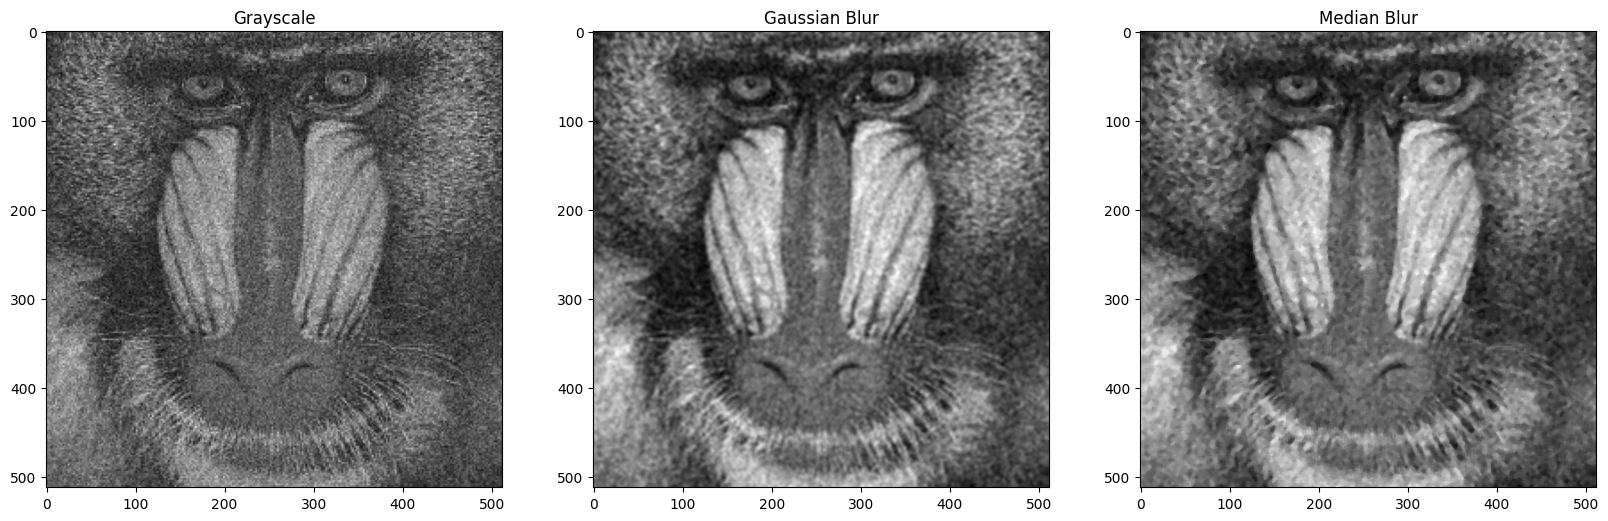

In [75]:
baboon = cv2.imread('baboon.tiff')
gray_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY)
gray_gaussian = cv2.GaussianBlur(gray_baboon, (5,5), 2)
gray_median = cv2.medianBlur(gray_baboon, 5)

figure = plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray_baboon, cmap='gray')
plt.title('Grayscale')
plt.subplot(132)
plt.imshow(gray_gaussian, cmap='gray')
plt.title('Gaussian Blur')
plt.subplot(133)
plt.imshow(gray_median, cmap='gray')
plt.title('Median Blur')
plt.show()

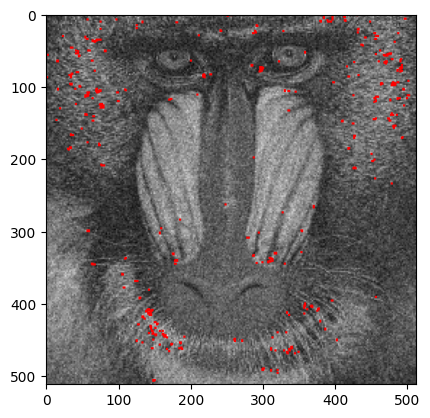

In [76]:
harris = cv2.cornerHarris(gray_gaussian, 2, 3, 0.04)
harris = cv2.dilate(harris, None)
baboon[harris>0.09*harris.max()]=[0, 0, 255]
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)

plt.imshow(baboon)
plt.show()

### Q2

In [77]:
p1 = np.array([
    [533.4, 140.2],
    [1047.3, 570],
    [2033.0, 491.8],
    [139.7, 1369.8],
    [1555.2, 2021.5],
    [927.1, 2869.0],
    [557.5, 3346.8],
    [1991.0, 3184.6]
])

p2 = np.array([
    [650.6, 524.9],
    [1008.2, 795.4],
    [1849.7, 1080.9],
    [235.9, 1730.0],
    [1510.1, 2012.5],
    [933.1, 2784.9],
    [671.7, 3169.5],
    [1858.7, 2938.1]
])

F = cv2.findFundamentalMat(p1, p2, cv2.FM_8POINT)
print(f"Fundamental Matrix : \n{F[0]}")


Fundamental Matrix : 
[[ 2.94255888e-07 -9.18612806e-07  4.18863297e-04]
 [ 9.61920746e-07 -7.26277059e-08 -2.06315409e-03]
 [-1.56420262e-03  2.12855841e-03  1.00000000e+00]]


In [78]:
F = np.array([
            [2.94255888e-07, -9.18612806e-07,  4.18863297e-04], 
            [ 9.61920746e-07, -7.26277059e-08, -2.06315409e-03], 
            [-1.56420262e-03,  2.12855841e-03,  1.00000000e+00]
])
rank = np.linalg.matrix_rank(F)
print(f"Rank of Fundamental Matrix is :{rank}")

e1 = []
e2 = []


Rank of Fundamental Matrix is :2


### Q3

In [82]:
import pandas as pd
import skimage
import skimage.io as io

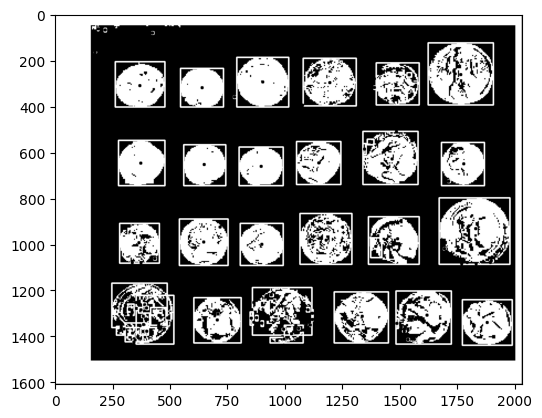

In [80]:
image = cv2.imread('03_segmentation_10_0.png', 0)
ret, thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 
# labeling
label_image = skimage.measure.label(thresh)

# connected components
props = skimage.measure.regionprops(label_image)
new_image = thresh.copy()

cnt, hrchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for i in props:
    #bounding box
    bbox = i.bbox
    #centroid
    cent = i.centroid
    cv2.drawContours(new_image, cnt, -1, (0,255,0))
    cv2.rectangle(new_image, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    cv2.circle(new_image, center =(int(cent[1]), int(cent[0])), radius = 2, color = (0, 0, 255), thickness = 10)

new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)
plt.show()       

### Q1

In [83]:
l = np.asmatrix([1, 1, -5])
m = np.asmatrix([4, -5, 7])

intersect_HC = np.cross(l,m)
intersect_HC = intersect_HC.T
print(intersect_HC)

intersect_EC = intersect_HC/intersect_HC[2,0]
intersect_EC = np.delete(intersect_EC, 2, 0)
print(intersect_EC)

[[-18]
 [-27]
 [ -9]]
[[2.]
 [3.]]
